In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)
data.A16 = data.A16.replace({"+":1,"-":0})
data.A14=data.A14.str[2:]
data.A2 = data.A2.replace(["?"],20.67)
data.A14 = data.A14.replace([""],120)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
for i in X.columns:
    X[i] = X[i].astype(float)
import random
import numpy as np
ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

In [3]:
data.A2 = data.A2.replace(["?"],20.67)

In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
for i in X.columns:
    X[i] = X[i].astype(float)

In [5]:
import random
import numpy as np
ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

In [6]:
X.isnull().sum()

A2     59
A3     72
A8     65
A11    67
A14    80
A15    71
dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [8]:
X_train.isnull().mean()

A2     0.097308
A3     0.109731
A8     0.097308
A11    0.086957
A14    0.107660
A15    0.103520
dtype: float64

array([[<Axes: title={'center': 'A2'}>, <Axes: title={'center': 'A3'}>],
       [<Axes: title={'center': 'A8'}>, <Axes: title={'center': 'A11'}>],
       [<Axes: title={'center': 'A14'}>, <Axes: title={'center': 'A15'}>]],
      dtype=object)

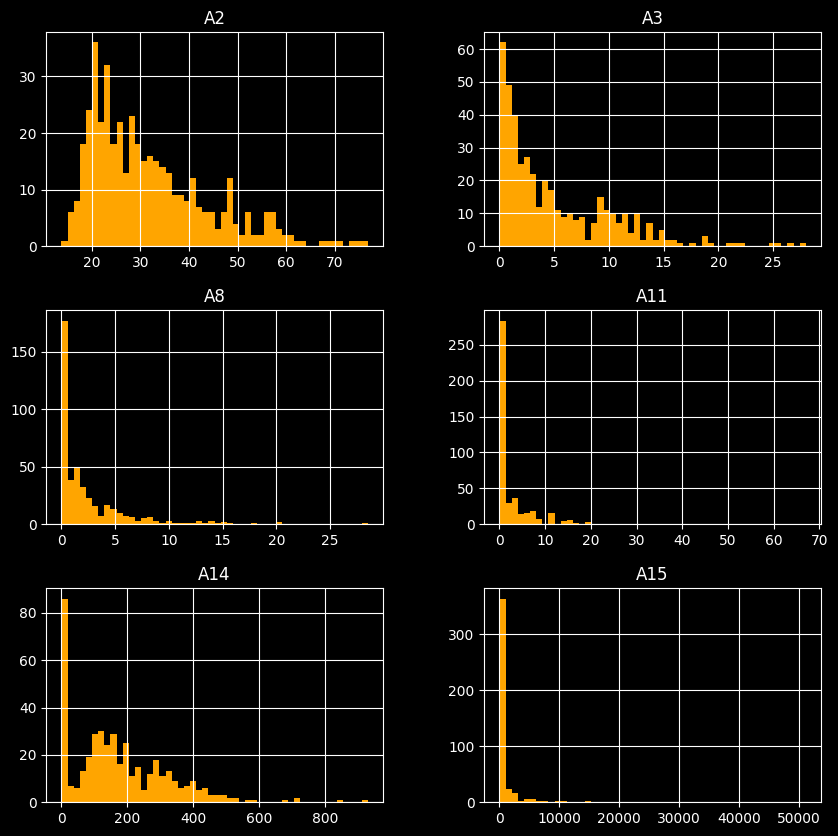

In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
X_train.hist(bins=50,figsize=(10,10),color="orange")

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
imp_missforest = IterativeImputer(
    estimator=ExtraTreesRegressor(),
    max_iter=40,
    random_state=0
).set_output(transform="pandas")

imp_missforest.fit(X_train[["A2","A3","A11","A15"]])

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=40, random_state=0)

In [11]:
train_t = imp_missforest.transform(X_train[["A2","A3","A11","A15"]]);train_t

,A2,A3,A11,A15
596,46.0800,3.0000,8.0,4159.0
303,15.9200,2.8750,0.0,0.0
204,36.3300,2.1250,4.8,1187.0
351,22.1700,0.5850,0.0,0.0
118,57.8300,7.0400,6.0,1332.0
...,...,...,...,...
359,36.7500,4.7100,0.0,0.0
192,41.7500,0.9600,0.0,600.0
629,24.9868,0.6650,0.0,5.0
559,22.8300,5.5241,7.0,2384.0


In [12]:
X_train.mean()

A2      31.720275
A3       5.033395
A8       2.432351
A11      2.657596
A14    175.679814
A15    985.230947
dtype: float64

In [13]:
train_t.mean()

A2       31.690115
A3        5.103515
A11       2.731573
A15    1023.447764
dtype: float64

<Axes: ylabel='Density'>

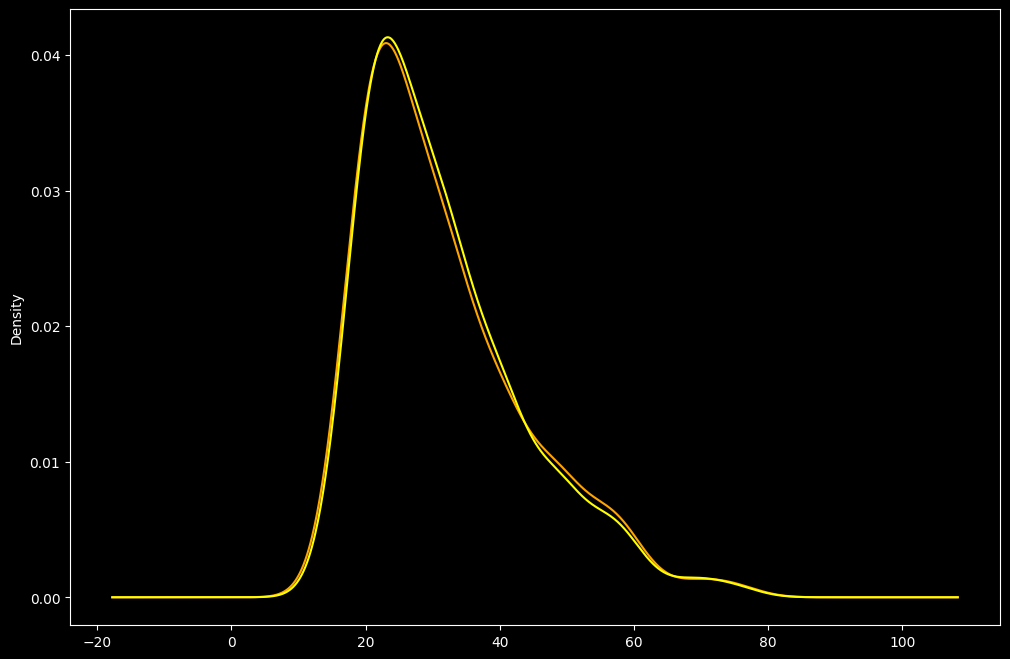

In [15]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

X_train["A2"].plot(kind="kde",ax=ax,color="orange")
train_t["A2"].plot(kind="kde",ax=ax,color="yellow")

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    n_neighbors=10,
    weights="distance",
    metric="nan_euclidean",
    add_indicator=False
).set_output(transform="pandas")
imputer.fit(X_train)
knn_t = imputer.transform(X_train)

In [19]:
knn_t

,A2,A3,A8,A11,A14,A15
596,46.080000,3.000000,2.375,8.000000,396.000000,4159.0
303,15.920000,2.875000,0.085,0.000000,120.000000,0.0
204,36.330000,2.125000,0.085,20.024624,423.789943,1187.0
351,22.170000,0.585000,0.000,0.000000,100.000000,0.0
118,57.830000,7.040000,14.000,6.000000,360.000000,1332.0
...,...,...,...,...,...,...
359,36.750000,4.710000,0.000,0.000000,160.000000,0.0
192,41.750000,0.960000,2.500,0.000000,510.000000,600.0
629,25.678816,0.665000,1.665,0.000000,220.000000,5.0
559,22.830000,5.637537,2.290,7.000000,140.000000,2384.0


In [22]:
ort=X_train.mean().to_dict()
train_mean = X_train.fillna(ort)

<Axes: ylabel='Density'>

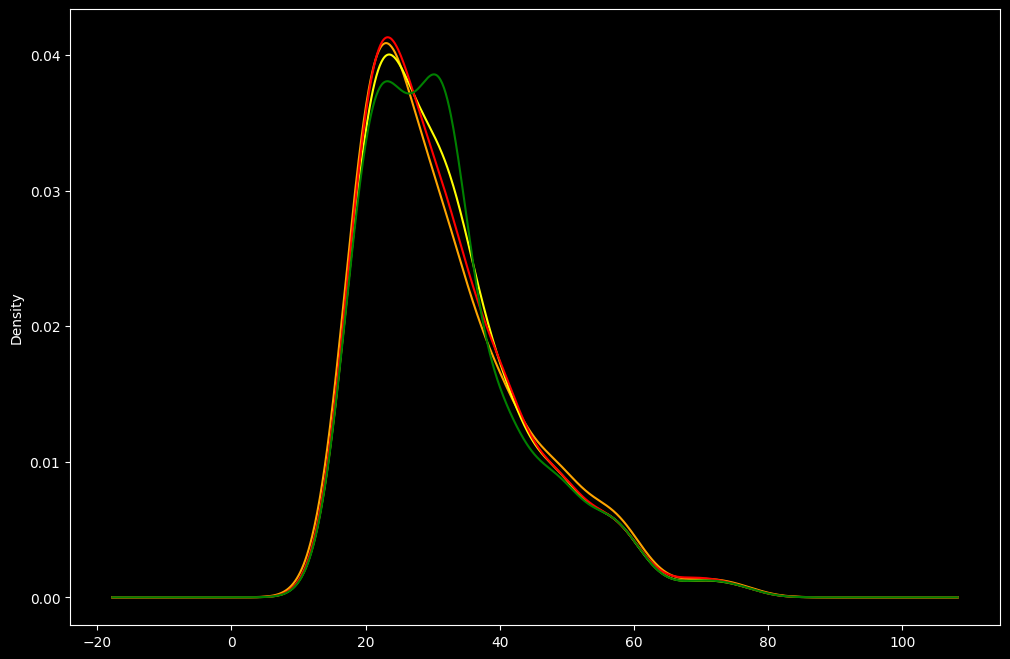

In [23]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

X_train["A2"].plot(kind="kde",ax=ax,color="orange")
knn_t["A2"].plot(kind="kde",ax=ax,color="yellow")
train_t["A2"].plot(kind="kde",ax=ax,color="red")
train_mean["A2"].plot(kind="kde",ax=ax,color="green")